In [20]:
# Import libary and dependencies
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Read the data
file_path=('cleaned_data.csv')
data=pd.read_csv(file_path, index_col = 0)
data.head()

,Status,ZipCode,City,Price,Days_on_market,Beds,Baths,Sqft,Date,Acres,Lot_sqft,Liv_index
0,A,98001,Auburn,725000,4,3,0.00,3060,5/26/2021,0.227,9894,68
1,A,98001,Auburn,300000,4,2,1.00,920,5/26/2021,0.164,7150,68
2,S,98001,Auburn,555000,3,2,1.00,1196,5/7/2021,0.544,23689,68
3,A,98001,Auburn,1300000,220,4,1.75,2850,10/22/2020,6.000,261360,68
4,S,98001,Auburn,250000,46,2,1.50,1200,5/20/2021,0.220,9600,68


In [22]:
data = data.drop(columns=["Date"])
data.head()

,Status,ZipCode,City,Price,Days_on_market,Beds,Baths,Sqft,Acres,Lot_sqft,Liv_index
0,A,98001,Auburn,725000,4,3,0.00,3060,0.227,9894,68
1,A,98001,Auburn,300000,4,2,1.00,920,0.164,7150,68
2,S,98001,Auburn,555000,3,2,1.00,1196,0.544,23689,68
3,A,98001,Auburn,1300000,220,4,1.75,2850,6.000,261360,68
4,S,98001,Auburn,250000,46,2,1.50,1200,0.220,9600,68


In [54]:
pd.get_dummies(data, columns=['City', "Status"])

,ZipCode,Price,Days_on_market,Beds,Baths,Sqft,Acres,Lot_sqft,Liv_index,City_Algona,...,City_SeaTac,City_Seattle,City_Shoreline,City_Snoqualmie,City_Tukwila,City_Vashon,City_Woodinville,City_Yarrow Point,Status_A,Status_S
0,98001,725000,4,3,0.00,3060,0.227,9894,68,0,...,0,0,0,0,0,0,0,0,1,0
1,98001,300000,4,2,1.00,920,0.164,7150,68,0,...,0,0,0,0,0,0,0,0,1,0
2,98001,555000,3,2,1.00,1196,0.544,23689,68,0,...,0,0,0,0,0,0,0,0,0,1
3,98001,1300000,220,4,1.75,2850,6.000,261360,68,0,...,0,0,0,0,0,0,0,0,1,0
4,98001,250000,46,2,1.50,1200,0.220,9600,68,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,98033,1598000,2,3,3.50,3160,0.093,4047,81,0,...,0,0,0,0,0,0,0,0,1,0
4184,98033,1799900,59,4,3.25,3341,0.247,10738,81,0,...,0,0,0,0,0,0,0,0,1,0
4185,98033,3200000,20,4,3.50,4013,0.189,8226,81,0,...,0,0,0,0,0,0,0,0,1,0
4186,98033,10700000,52,4,3.25,3180,11.960,520991,81,0,...,0,0,0,0,0,0,0,0,1,0


count    4.128000e+03
mean     1.171752e+06
std      1.229190e+06
min      1.390000e+05
25%      6.599900e+05
50%      8.682225e+05
75%      1.299238e+06
max      2.750000e+07
Name: Price, dtype: float64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4187
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Status          4128 non-null   object 
 1   ZipCode         4128 non-null   int64  
 2   City            4128 non-null   object 
 3   Price           4128 non-null   int64  
 4   Days_on_market  4128 non-null   int64  
 5   Beds            4128 non-null   int64  
 6   Baths           4128 non-null   float64
 7   Sqft            4128 non-null   int64  
 8   Acres           4128 non-null   float64
 9   Lot_sqft        4128 non-null   int64  
 10  Liv_index       4128 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 516.0+ KB


In [25]:
print(data['Price'].describe().apply(lambda x: '{:,.1f}'.format(x)))

count         4,128.0
mean      1,171,752.0
std       1,229,190.1
min         139,000.0
25%         659,990.0
50%         868,222.5
75%       1,299,237.5
max      27,500,000.0
Name: Price, dtype: object


C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\matplotlib\

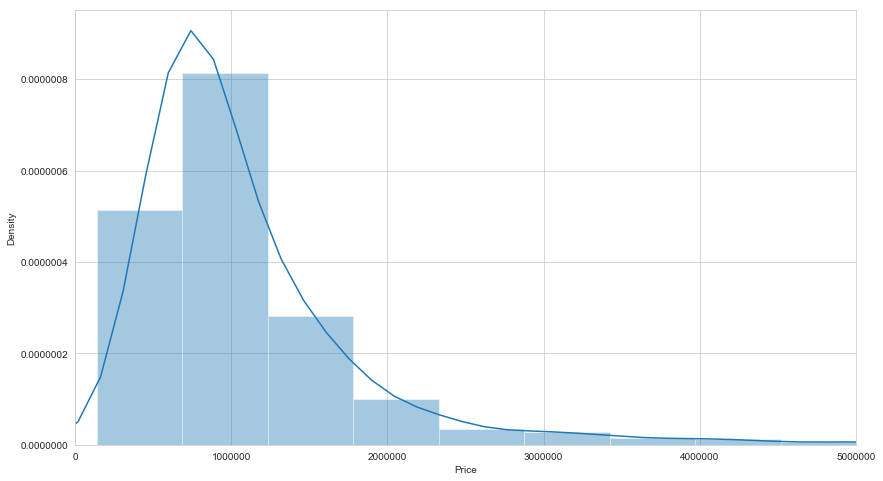

In [26]:
# Sale Price Distribution
fig, ax = plt.subplots(figsize=(14,8))
sns.set_style("whitegrid")
sns.distplot(data['Price'])
plt.xlim(0,5000000)
plt.show()

In [43]:
data['Price'].mean()

1171752.0479651163

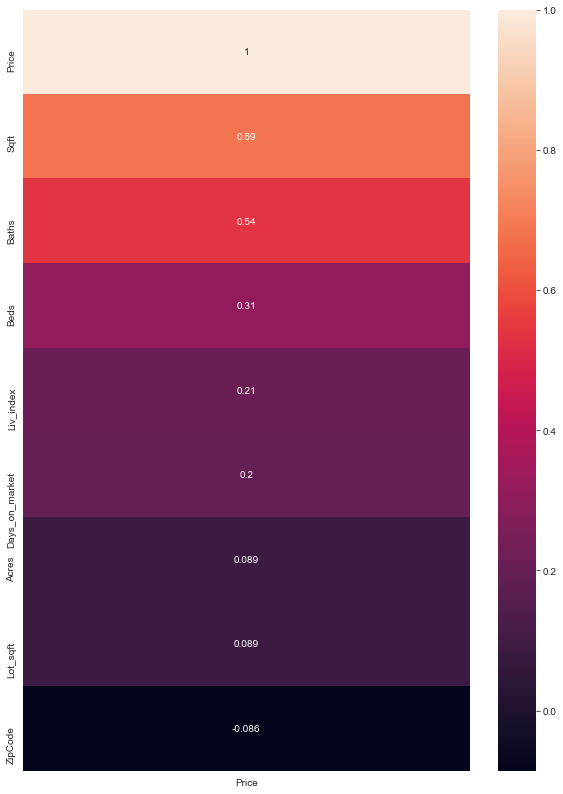

In [27]:
# Correlation to price value using heatmap
fig, ax = plt.subplots(figsize=(10,14))
price_corr = data.corr()[['Price']].sort_values(
  by='Price', ascending=False)
sns.heatmap(price_corr, annot=True, ax=ax) 

C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\U

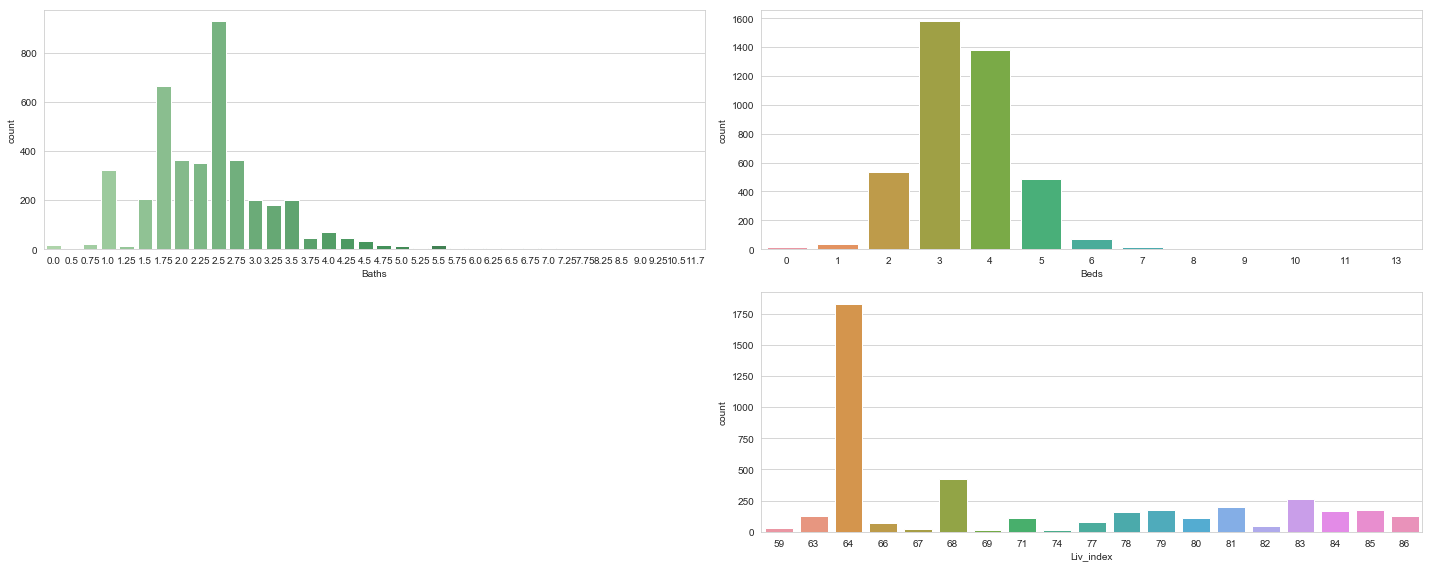

In [28]:
#visualizing bedrooms, bathrooms, floors,grades
fig = plt.figure(figsize=(20,8),constrained_layout=True)
fig.add_subplot(2,2,1)
sns.countplot(data['Baths'], palette = 'Greens_d')
fig.add_subplot(2,2,2)
sns.countplot(data['Beds'])
fig.add_subplot(2,2,4)
sns.countplot(data['Liv_index'])
plt.tight_layout()

C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


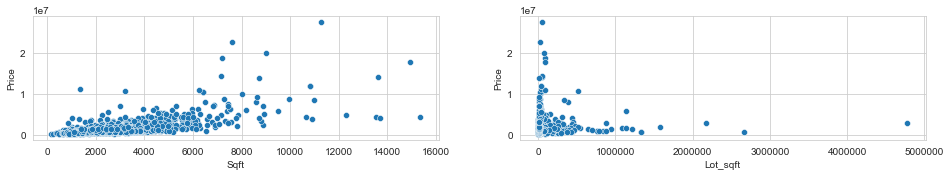

In [29]:
# sqft liveing and price scatter plot
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(data['Sqft'], data['Price'])
fig.add_subplot(2,2,2)
sns.scatterplot(data['Lot_sqft'],data['Price'])




## Scaling and Train Test Split

In [30]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [31]:
X = data.drop('Price',axis =1).values
y = data['Price'].values
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [39]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

ValueError: could not convert string to float: 'S'

## Method1 : Linear Regression

In [40]:
#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

ValueError: could not convert string to float: 'S'

In [ ]:
y_predd = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
df1 = df.head(10)
df1

In [ ]:
from sklearn import metrics
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))rom sklearn import metrics


## Method2: Neural Network

In [45]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [47]:

# having 10 nueron is based on the number of available featurs

model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [49]:
#Training model
#model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=100)

IndentationError: unexpected indent (<ipython-input-49-6a8ad0d42347>, line 2)

In [51]:
#model.summary()

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [ ]:
# Evaluation on Test Data

In [ ]:
y_pred = model.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df2.head(10)
df2

In [ ]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

## Method3: Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)

regressor.fit(X_train, y_train)

The next step is to predict the output values:

predicted_price = regressor.predict(test_features)

In [ ]:
y_predd = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_preddd})
df3 = df.head(10)
df3

In [ ]:
from sklearn import metrics
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_preddd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_preddd))))rom sklearn import metrics
